In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
db_path = "../../vic_crash_data.db"
conn = sqlite3.connect(db_path)

Accidents (counts and Fatal) by Hour of Day

In [13]:
query = """
select strftime('%H',a.accident_time) as hour_of_day, count(a.accident_no) as no_of_accidents,
count(case when severity = 1 then 1 end) as fatal_accidents 
from accidents a 
group by hour_of_day
"""

hour_of_day = pd.read_sql_query(query, conn)
hour_of_day

,hour_of_day,no_of_accidents,fatal_accidents
0,00,2459,91
1,01,2057,77
2,02,1599,72
3,03,1494,65
4,04,1472,49
5,05,2663,95
6,06,5949,143
7,07,8287,120
8,08,12092,131
9,09,10007,136


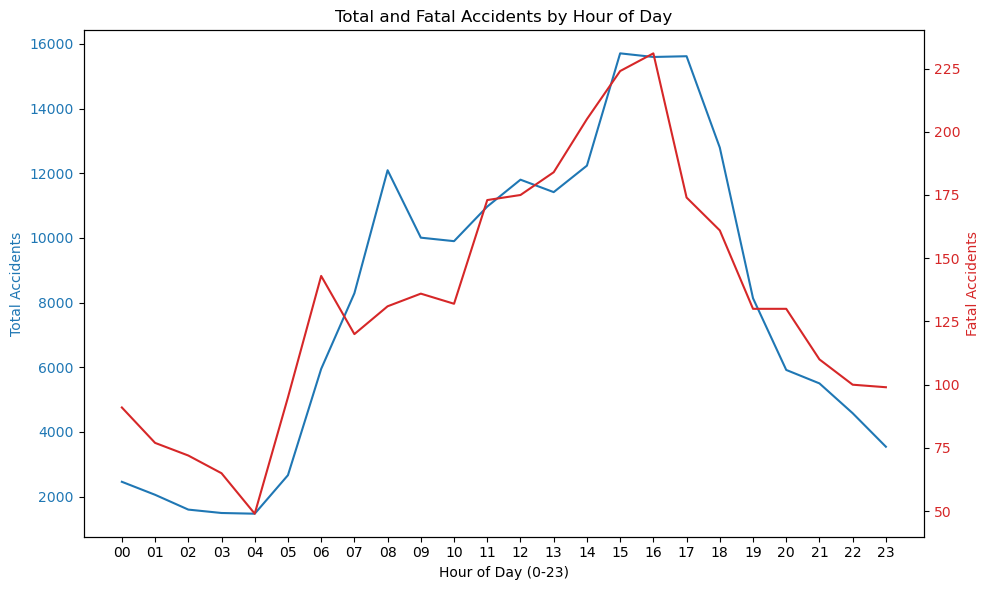

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))
color1 = 'tab:blue'
color2 = 'tab:red'


ax1.set_xlabel('Hour of Day (0-23)')
ax1.set_ylabel('Total Accidents', color = color1)
ax1.plot(hour_of_day['hour_of_day'], hour_of_day['no_of_accidents'], color = color1, label = "Total Accidents")
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
ax2.set_ylabel('Fatal Accidents', color = color2)
ax2.plot(hour_of_day['hour_of_day'], hour_of_day['fatal_accidents'], color = color2, label = "Total Fatal Accidents")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Total and Fatal Accidents by Hour of Day')
fig.tight_layout()
plt.show()